In [11]:
 import numpy as np
 import pandas as pd
 from sklearn.model_selection import train_test_split

In [17]:
from keras.datasets import imdb

# Load dataset (only top 10,000 most frequent words)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Check shapes
print("X_train shape:", X_train.shape)  # (25000,)
print("X_test shape:", X_test.shape)    # (25000,)
print("y_train shape:", y_train.shape)  # (25000,)
print("y_test shape:", y_test.shape)    # (25000,)

# Print first review and label
print("Review is:", X_train[0])  # List of integers (word indices)
print("Label is:", y_train[0])   # 0 or 1 (negative/positive)


X_train shape: (25000,)
X_test shape: (25000,)
y_train shape: (25000,)
y_test shape: (25000,)
Review is: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 44

In [19]:
import numpy as np
from keras.datasets import imdb

# Load dataset with top 10,000 most frequent words
(data, label), _ = imdb.load_data(num_words=10000)

# Vectorization function
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# Split into training and testing sets
test_x = data[:10000]
test_y = label[:10000]
train_x = data[10000:]
train_y = label[10000:]

# Shape checks
print("test_x.shape:", np.shape(test_x))    # (10000,)
print("test_y.shape:", np.shape(test_y))    # (10000,)
print("train_x.shape:", np.shape(train_x))  # (40000,)
print("train_y.shape:", np.shape(train_y))  # (40000,)

# Label info
print("Categories:", np.unique(label))  # [0 1]
print("Number of unique words:", len(np.unique(np.hstack(data))))

# Review length statistics
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))


test_x.shape: (10000,)
test_y.shape: (10000,)
train_x.shape: (15000,)
train_y.shape: (15000,)
Categories: [0 1]
Number of unique words: 9998
Average Review length: 238.71364
Standard Deviation: 176


Label 0: 1
Label 1: 0
Tokenized review 0: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1641221/1641221 ━━

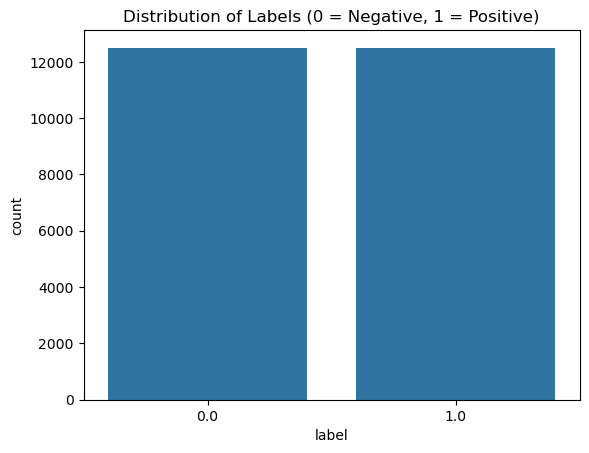

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import imdb

# Load the IMDB dataset
(data, label), _ = imdb.load_data(num_words=10000)

# Show labels
print("Label 0:", label[0])  # 1 = Positive
print("Label 1:", label[1])  # 0 = Negative

# Print raw token indices for a review
print("Tokenized review 0:", data[0])

# Decode back to words
index = imdb.get_word_index()  # word to index
reverse_index = dict([(value, key) for (key, value) in index.items()])
decoded = " ".join([reverse_index.get(i - 3, "#") for i in data[0]])
print("\nDecoded Review 0:")
print(decoded)

# Vectorize the data (binary bag-of-words representation)
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

data = vectorize(data)
label = np.array(label).astype("float32")

# Create DataFrame for label visualization
label_df = pd.DataFrame({'label': label})
sns.countplot(x='label', data=label_df)
plt.title("Distribution of Labels (0 = Negative, 1 = Positive)")
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import models
from keras import layers
import numpy as np

# Assuming `data` and `label` are already vectorized and prepared
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.20, random_state=1)

print("X_train shape:", X_train.shape)  # (40000, 10000)
print("X_test shape:", X_test.shape)    # (10000, 10000)

# Create Sequential Model
model = models.Sequential()

# Input Layer (10,000-dimensional input → 50 neurons)
model.add(layers.Dense(50, activation="relu", input_shape=(10000,)))

# Hidden Layers with Dropout
model.add(layers.Dropout(0.3))  # 30% dropout
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dropout(0.2))  # 20% dropout
model.add(layers.Dense(50, activation="relu"))

# Output Layer (binary classification)
model.add(layers.Dense(1, activation="sigmoid"))

# Show model architecture
model.summary()


X_train shape: (20000, 10000)
X_test shape: (5000, 10000)


C:\Users\adity\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │       500,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 505,201 (1.93 MB)

 Trainable params: 505,201 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# EarlyStopping to avoid overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Compile the model
model.compile(
    optimizer="adam",                       # Optimizer for weight updates
    loss="binary_crossentropy",            # Loss function for binary classification
    metrics=["accuracy"]                   # Evaluation metric
)

# Train the model
results = model.fit(
    X_train, y_train,
    epochs=2,
    batch_size=500,
    validation_data=(X_test, y_test),
    callbacks=[callback]
)

# Print mean validation accuracy
print("Mean validation accuracy:", np.mean(results.history["val_accuracy"]))

# Evaluate the model on test data
score = model.evaluate(X_test, y_test, batch_size=500)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.6532 - loss: 0.6181 - val_accuracy: 0.8804 - val_loss: 0.2990
Epoch 2/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9043 - loss: 0.2540 - val_accuracy: 0.8878 - val_loss: 0.2797
Mean validation accuracy: 0.8840999901294708
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8904 - loss: 0.2698 
Test loss: 0.2797152101993561
Test accuracy: 0.8877999782562256


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


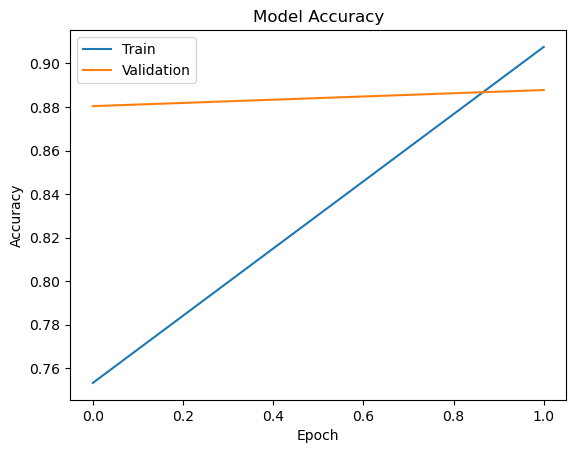

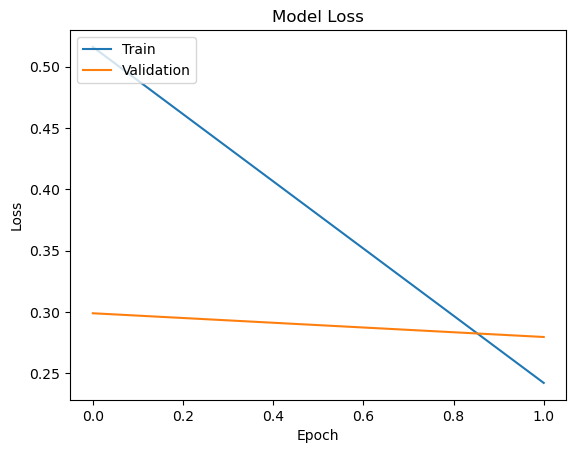

In [27]:
import matplotlib.pyplot as plt

# Check available metrics
print(results.history.keys())

# Plot accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
